In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1. Connect to the database file (it creates 'sales_data.db' if it doesn't exist)
DB_FILE = "sales_data.db"
conn = sqlite3.connect(DB_FILE)
print(f"Successfully connected to {DB_FILE}")

Successfully connected to sales_data.db


In [2]:
create_table_sql = """
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
);
"""

cursor = conn.cursor()
cursor.execute(create_table_sql)

print("Table 'sales' created successfully.")

Table 'sales' created successfully.


In [3]:
sample_data = [
    ('Laptop', 5, 1200.00),
    ('Monitor', 10, 300.00),
    ('Mouse', 25, 25.00),
    ('Laptop', 2, 1200.00),
    ('Keyboard', 15, 75.00),
    ('Monitor', 4, 300.00)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)
conn.commit()
print("Sample data inserted and committed.")

Sample data inserted and committed.


In [4]:
# The SQL query to get total quantity and total revenue per product
sql_query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM
    sales
GROUP BY
    product
ORDER BY
    revenue DESC;
"""

# Use pandas to execute the query and store the results in a DataFrame (df)
df = pd.read_sql_query(sql_query, conn)

print("--- Basic Sales Summary Results ---")
# Displays output using print (a required deliverable)
print(df)

--- Basic Sales Summary Results ---
    product  total_qty  revenue
0    Laptop          7   8400.0
1   Monitor         14   4200.0
2  Keyboard         15   1125.0
3     Mouse         25    625.0



Chart saved as 'sales_chart.png' in your notebook's directory.


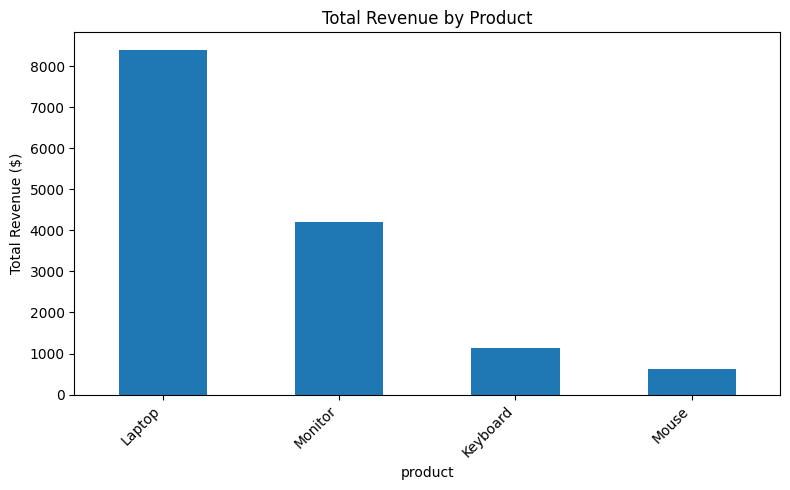

In [5]:
# Create the bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, 
        title='Total Revenue by Product', figsize=(8, 5))

plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the chart as a PNG file (required deliverable)
plt.savefig('sales_chart.png')
print("\nChart saved as 'sales_chart.png' in your notebook's directory.")

# Display the chart (if working outside a notebook, you would skip plt.show())
plt.show()

In [6]:
conn.close()
print("Database connection closed. Task complete!")

Database connection closed. Task complete!
